# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms.

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from collections.abc import Callable
import pandas as pd

In [146]:
def f(x: float) -> float:
    return 1 / (x ** 2 - 3 * x + 2)

def ff(x_k: float) -> float:
    f_x = f(x_k)
    if f_x < -100:
        return -100 + np.random.normal()
    elif f_x >= -100 and f_x <= 100:
        return f_x + np.random.normal()
    else:
        return 100 + np.random.normal()

In [147]:
n = 1001

x = [3 * k / 1000 for k in range(n)]
y = [ff(x_k) for x_k in x]

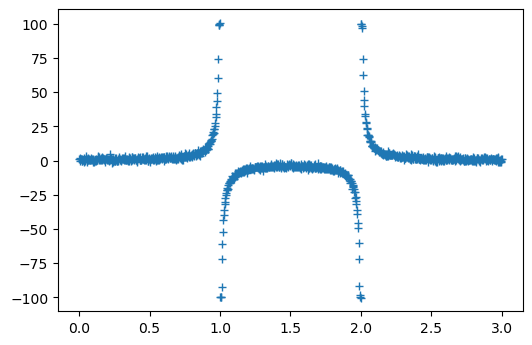

In [148]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y, '+')

In [149]:
def rational(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def loss(fn, args) -> float:
    return sum([(fn(x[k], args[0], args[1], args[2], args[3]) - y[k]) ** 2 for k in range(n)])

In [150]:
import scipy.optimize as optimize

def nelder_mead(fn: Callable, x0: tuple[float], epsilon: float = 0.001):
    return optimize.minimize(
        fn,
        x0=x0,
        method='Nelder-Mead',
        tol=epsilon
    )

In [151]:
nm_result = nelder_mead(partial(loss, rational), (0.5, 0.5, 0.5, 0.5))
nm_a = nm_result.x[0]
nm_b = nm_result.x[1]
nm_c = nm_result.x[2]
nm_d = nm_result.x[3]

In [152]:
def levenberg_marquardt(fn: Callable, x: list[float], y: list[float]):
    return optimize.curve_fit(
        fn,
        xdata=x,
        ydata=y,
        method='lm'
    )

In [153]:
lm_result = levenberg_marquardt(rational, x, y)
lm_a = lm_result[0][0]
lm_b = lm_result[0][1]
lm_c = lm_result[0][2]
lm_d = lm_result[0][3]

In [154]:
def differential_evolution(fn: Callable, bounds: tuple[tuple[float]], epsilon: float = 0.001):
    return optimize.differential_evolution(
        fn,
        bounds=bounds,
        maxiter=1000,
        tol=epsilon
    )

In [155]:
de_result = differential_evolution(partial(loss, rational), ((-2.5, 2.5), (-2.5, 2.5), (-2.5, 2.5), (-2.5, 2.5)))
de_a = nm_result.x[0]
de_b = nm_result.x[1]
de_c = nm_result.x[2]
de_d = nm_result.x[3]

In [156]:
import pyswarm

def particle_swarm(fn: Callable, bounds: tuple[tuple[float]], epsilon: float = 0.001, limit: int = 1000):
    return pyswarm.pso(
        fn,
        lb=[bound[0] for bound in bounds],
        ub=[bound[1] for bound in bounds],
        maxiter=limit,
        minstep=epsilon
    )

In [157]:
ps_result = particle_swarm(partial(loss, rational), ((-2.5, 2.5), (-2.5, 2.5), (-2.5, 2.5), (-2.5, 2.5)))
ps_a = ps_result[0][0]
ps_b = ps_result[0][1]
ps_c = ps_result[0][2]
ps_d = ps_result[0][3]

Stopping search: Swarm best position change less than 0.001


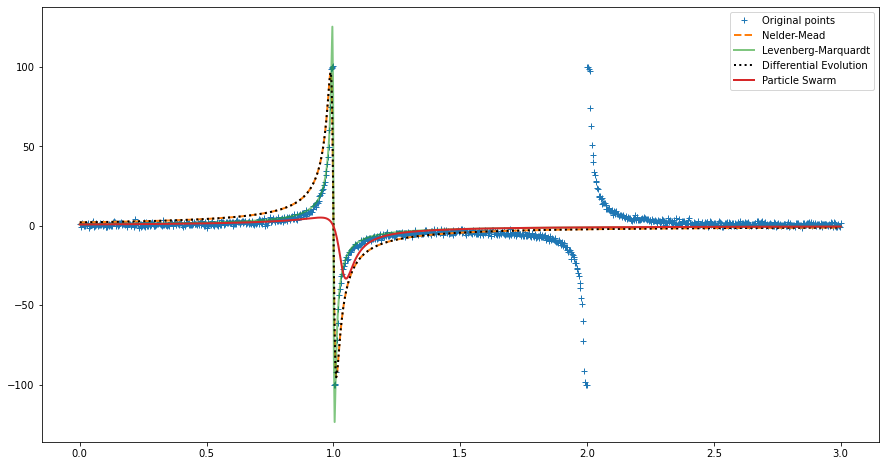

In [158]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y, '+', label='Original points')
ax.plot(x, [rational(x_k, nm_a, nm_b, nm_c, nm_d) for x_k in x], label='Nelder-Mead', linestyle='dashed', linewidth=2)
ax.plot(x, [rational(x_k, lm_a, lm_b, lm_c, lm_d) for x_k in x], label='Levenberg-Marquardt', alpha=0.6, linewidth=2)
ax.plot(x, [rational(x_k, de_a, de_b, de_c, de_d) for x_k in x], label='Differential Evolution', linestyle='dotted', color='black', linewidth=2)
ax.plot(x, [rational(x_k, ps_a, ps_b, ps_c, ps_d) for x_k in x], label='Particle Swarm', linewidth=2)

ax.legend()

In [159]:
pd.DataFrame(
    [
        ['Nelder Mead', nm_a, nm_b, nm_c, nm_d, nm_result.nit, nm_result.nfev],
        ['Levenberg-Marquardt', lm_a, lm_b, lm_c, lm_d, 'n/a', 'n/a'],
        ['Differential evolution', de_a, de_b, de_c, de_d, de_result.nit, de_result.nfev],
        ['Particle Swarm', ps_a, ps_b, ps_c, ps_d, 'n/a', 'n/a']
    ],
    columns=['Method', '$a_{min}$', '$b_{min}$', '$c_{min}$', '$d_{min}$', 'Iterations', 'F-Calculations']
)

,Method,$a_{min}$,$b_{min}$,$c_{min}$,$d_{min}$,Iterations,F-Calculations
0,Nelder Mead,-2.164204,2.165070,-2.000631,1.000757,204,369
1,Levenberg-Marquardt,-0.999667,1.000151,-2.000912,1.000928,n/a,n/a
2,Differential evolution,-2.164204,2.165070,-2.000631,1.000757,135,8225
3,Particle Swarm,-0.906206,0.905748,-2.072458,1.074955,n/a,n/a


In [160]:
points = []

with open('/opt/notebooks/4/wg59_xy.txt') as file:
    for line in file:
        points.append([float(x) for x in line.strip().split(' ') if x != ''])

cities = {}
        
with open('/opt/notebooks/4/wg59_name.txt') as file:
    for i, line in enumerate(file):
        cities[line.strip()] = points[i]

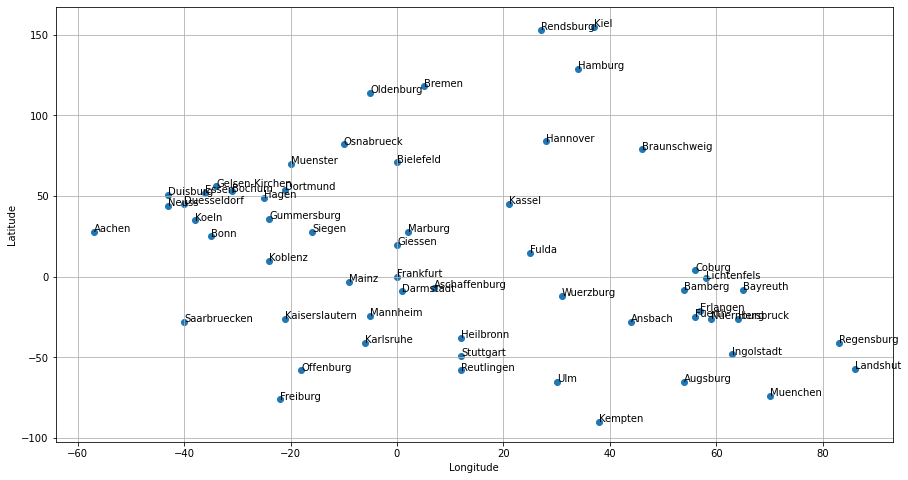

In [161]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.scatter([cities[city][0] for city in cities], [cities[city][1] for city in cities])

plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i, (name, point) in enumerate(cities.items()):
    ax.annotate(name, (point[0], point[1]))

In [162]:
import math
import random
from collections import defaultdict
from simanneal import Annealer

def distance(a, b):
    """Calculates distance between two latitude-longitude coordinates."""
    R = 3963  # radius of Earth (miles)
    lat1, lon1 = math.radians(a[0]), math.radians(a[1])
    lat2, lon2 = math.radians(b[0]), math.radians(b[1])
    return math.acos(math.sin(lat1) * math.sin(lat2) +
                     math.cos(lat1) * math.cos(lat2) * math.cos(lon1 - lon2)) * R

class TravellingSalesmanProblem(Annealer):

    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)

    def move(self):
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [163]:
init = list(cities)

# create a distance matrix
distance_matrix = defaultdict(dict)
for ka, va in cities.items():
    for kb, vb in cities.items():
        distance_matrix[ka][kb] = 0.0 if kb == ka else distance(va, vb)

tsp = TravellingSalesmanProblem(init, distance_matrix)
tsp.set_schedule(tsp.auto(minutes=0.5))
tsp.copy_strategy = "slice"
result, e = tsp.anneal()

print()
print("%i mile route:" % e)
print(" ➞  ".join(result))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
    49.00000      75796.12     1.40%     0.00%     0:00:02    -1:59:59 Temperature        Energy    Accept   Improve     Elapsed   Remaining
    49.00000      68646.28     1.95%     0.14%     0:00:12     0:00:00


68486 mile route:
Heilbronn ➞  Karlsruhe ➞  Kaiserslautern ➞  Mannheim ➞  Darmstadt ➞  Aschaffenburg ➞  Frankfurt ➞  Mainz ➞  Koblenz ➞  Bonn ➞  Koeln ➞  Neuss ➞  Duesseldorf ➞  Gummersburg ➞  Siegen ➞  Marburg ➞  Giessen ➞  Fulda ➞  Bamberg ➞  Coburg ➞  Lichtenfels ➞  Bayreuth ➞  Regensburg ➞  Landshut ➞  Muenchen ➞  Ingolstadt ➞  Hersbruck ➞  Nuernburg ➞  Erlangen ➞  Fuerth ➞  Ansbach ➞  Augsburg ➞  Kempten ➞  Ulm ➞  Reutlingen ➞  Stuttgart ➞  Offenburg ➞  Freiburg ➞  Saarbruecken ➞  Aachen ➞  Duisburg ➞  Essen ➞  Gelsen-Kirchen ➞  Bochum ➞  Hagen ➞  Dortmund ➞  Muenster ➞  Bielefeld ➞  Osnabrueck ➞  Oldenburg ➞  Bremen ➞  Rendsburg ➞  Kiel ➞  Hamburg ➞  Braunschweig ➞  Hannover ➞  Kassel ➞  Wuerzburg


In [186]:
tsp = TravellingSalesmanProblem(init, distance_matrix)

print('Initial path length: ', tsp.energy())

Initial path length:  302329.4109299531


In [164]:
def plot_travelling_salesman(result):
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(1, 1, 1)

    ax.scatter([cities[city][0] for city in cities], [cities[city][1] for city in cities], color='r')

    plt.grid()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    for i, (name, point) in enumerate(cities.items()):
        ax.annotate(name, (point[0], point[1]))

    start_end = cities[result[0]]
    ax.add_artist(plt.Circle((start_end[0], start_end[1]), 8, color='r', fill=False))

    for i, item in enumerate(result):
        if i == len(result) - 1:
            next_item = result[0]
        else:
            next_item = result[i + 1]

        plt.arrow(
            cities[item][0],
            cities[item][1],
            cities[next_item][0] - cities[item][0],
            cities[next_item][1] - cities[item][1],
            head_width=2,
            color ='b',
            length_includes_head=True
        )

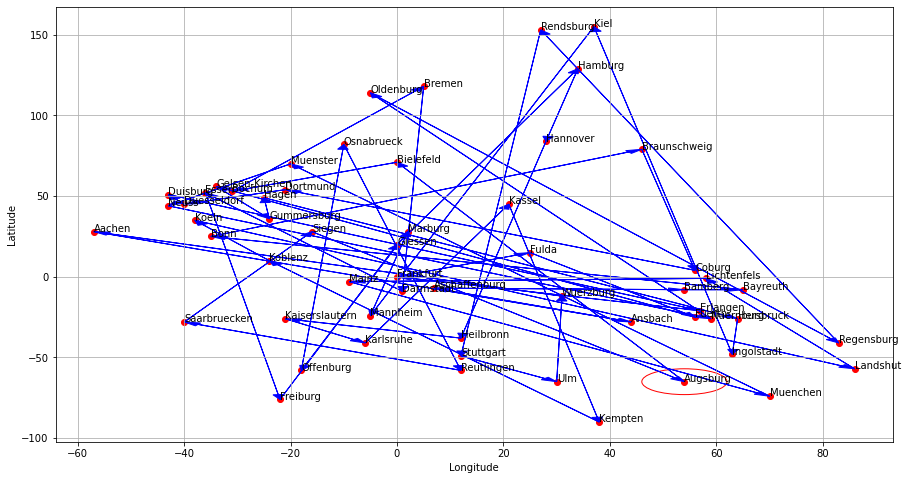

In [165]:
plot_travelling_salesman(init)

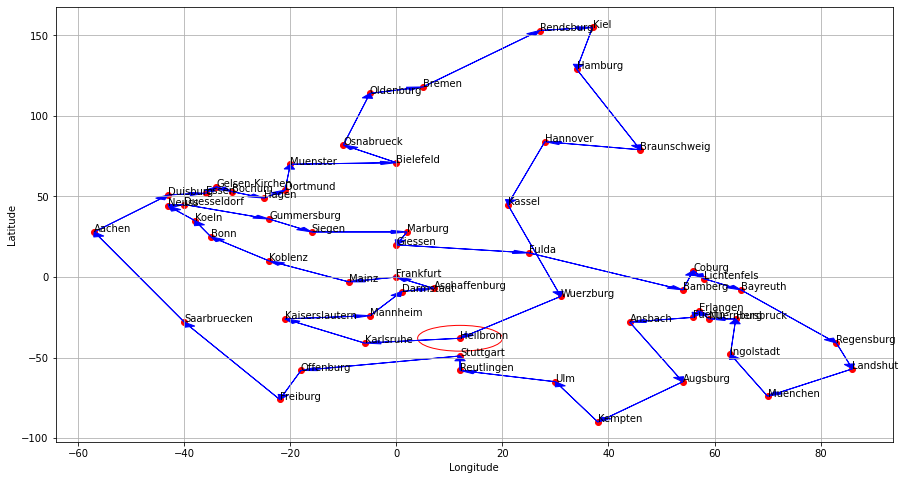

In [166]:
plot_travelling_salesman(result)